<a href="https://colab.research.google.com/github/jcdevaney/audioUnderstandingSp2025/blob/main/week3/representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import matplotlib.pylab as plt
import librosa
import librosa.display
import IPython.display

!pip install pyampact
from IPython.utils import io
with io.capture_output() as captured:
    !pip install --upgrade pandas
    !pip install mido
    !pip install pyampact
    import pyampact

#import audio files
!git clone https://github.com/jcdevaney/pyAMPACTtutorials.git

fatal: destination path 'pyAMPACTtutorials' already exists and is not an empty directory.


In [ ]:
piece = pyampact.Score('/content/pyAMPACTtutorials/test_files/aveMaria_seg.mid')

piece.notes()

,Part-1
0.00000,B-4
3.25000,r
3.50000,A4
4.00000,B-4
4.66667,D5
8.25000,C5
8.75000,B-4


In [ ]:
piece.midiPitches()

,Part-1
0.00000,70
3.25000,-1
3.50000,69
4.00000,70
4.66667,74
8.25000,72
8.75000,70


Text(0, 0.5, 'MIDI Note')

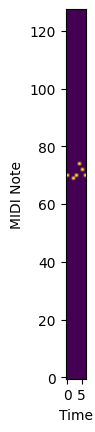

In [ ]:
pianoRoll = piece.pianoRoll()
plt.imshow(pianoRoll, origin='lower')
plt.xlabel('Time')
plt.ylabel('MIDI Note')

Text(0, 0.5, 'MIDI Note')

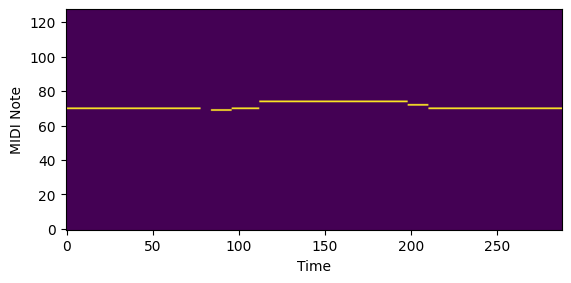

In [ ]:
sampled = piece.sampled(bpm=60,obs=24)
plt.imshow(sampled, origin='lower')
plt.xlabel('Time')
plt.ylabel('MIDI Note')

In [ ]:
sig , sr = librosa.load('/content/pyAMPACTtutorials/test_files/aveMaria_seg.wav')
IPython.display.Audio(data=sig, rate=sr)

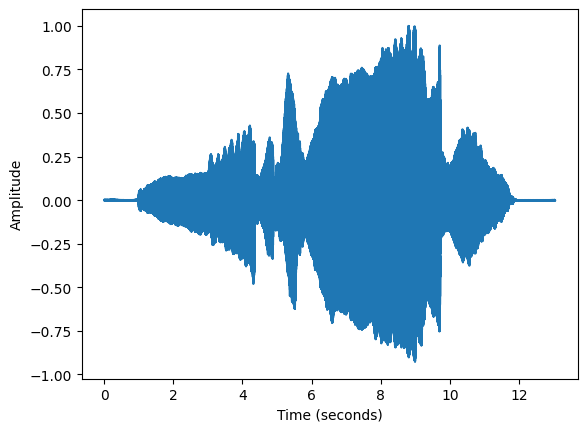

In [ ]:
# create an array with time points in the signal in secs
time=np.arange(0,sig.shape[0])/sr

# normalize the audio signal to be between -1 and 1
excursion=max(abs(sig))
sigNew = sig / excursion

# plot the time-domain representation of the audio signal
plt.plot(time,sigNew)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

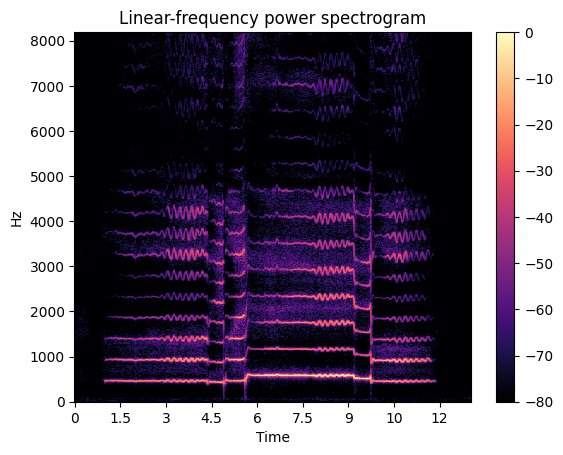

In [ ]:
# create a normalized spectrogram
# this includes several function calls
# first create a basic specgrogram with librosa.stft() with the default window size (2048)
# then make all of values in the spectrogram positive with np.abs()
# then scale the spectogram to be in decibels, so it better reflects how we hear librosa.amplitude_to_db()
spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)

# display the normalized spectrogram with a linear frequency scale
fig, ax = plt.subplots()
img=librosa.display.specshow(spec, y_axis='linear', x_axis='time', ax=ax)
ax.set(ylim=[0, 8192])
plt.colorbar(img, ax=ax)
plt.title('Linear-frequency power spectrogram')
plt.show()

y_lim = ax.get_ylim()

<ipython-input-52-1a454019f05b>:5: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  plt.colorbar(img, ax=ax)


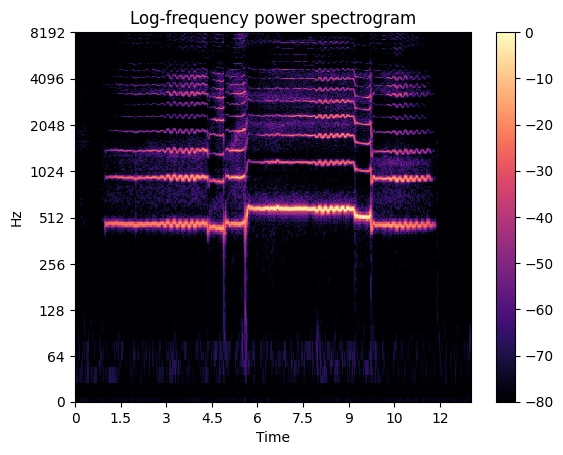

In [ ]:
# display the normalized spectrogram with a log frequency scale
fig, ax = plt.subplots()
librosa.display.specshow(spec, y_axis='log', x_axis='time', ax=ax)
ax.set(ylim=[0, 8192])
plt.colorbar(img, ax=ax)
plt.title('Log-frequency power spectrogram')
plt.show()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

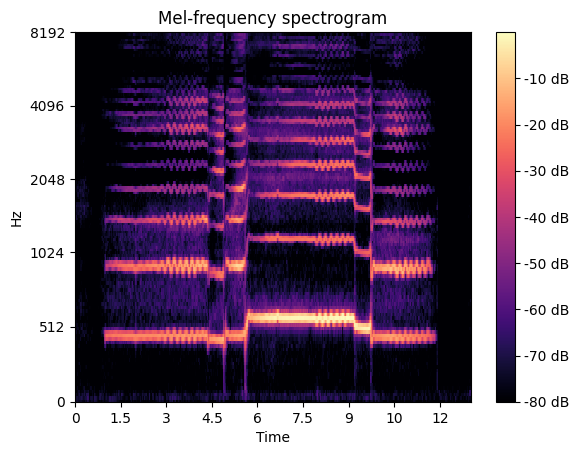

In [ ]:
S = librosa.feature.melspectrogram(y=sig, sr=sr, n_mels=128,
                                    fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(ylim=[0,8192])
ax.set(title='Mel-frequency spectrogram')

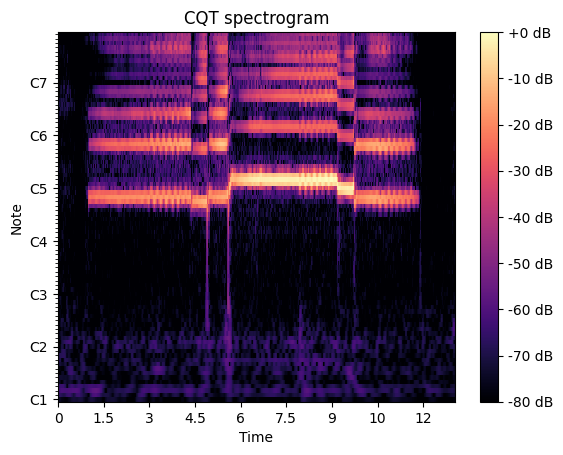

In [ ]:
C = np.abs(librosa.cqt(sig, sr=sr))

# display the normalized spectrogram with a linear frequency scale
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note')
ax.set(ylim=[0, 8192])
plt.colorbar(format='%+2.0f dB')
plt.title('CQT spectrogram')
plt.show()

[Text(0.5, 1.0, 'Reassigned spectrogram')]

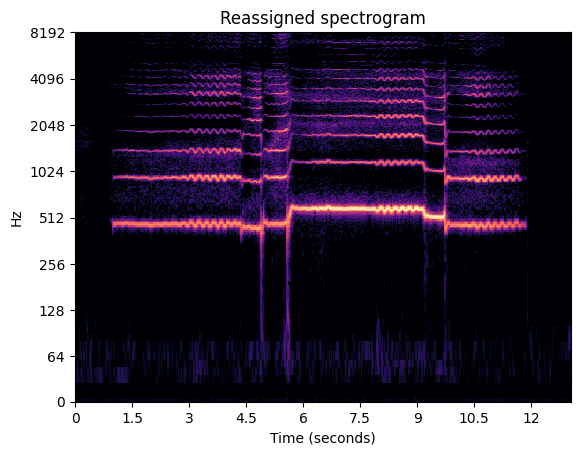

In [ ]:
freqs, times, mags = librosa.reassigned_spectrogram(y=sig, sr=sr, reassign_frequencies=True)
mags_db = librosa.amplitude_to_db(mags, ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(mags_db, x_axis="s", y_axis="log", sr=sr,ax=ax)
ax.set(ylim=[0,8192])
ax.set(title='Reassigned spectrogram')